[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Borgers-Examples-in-BMTK/blob/main/27-Delayed_Pulse/27_Delayed_Pulse_Coupled_model.ipynb)

# 27 Oscillators Coupled by Delayed Pulses
#### by Matthew Stroud and Gregory Glickert

### Delta of 0.1

Define g and f functions:

In [7]:
import math

def g(phi):
    e=1/3
    num = e*phi*(1-phi)
    #print(num)
    return num


def f(phi):
    num = phi + g(phi)
    #print(num)
    return num

We run the simulation:

In [8]:
delta=0.1
phi_A=0.0
phi_B=0.9            
t_A_to_B=delta                 
                                
t_B_to_A=1e100                
t_present=0                    
t_final=20                     

num_spikes_A=1
num_spikes_B=0 
t_spikes_A=[0] 
t_spikes_B=[]


                                

while t_present<t_final:
    #pdb.set_trace()
    T_vec=[round(1-phi_A,4),round(1-phi_B,4),t_A_to_B,t_B_to_A]
    T_0=min(T_vec)
    done=0
   
    if T_0==round(1-phi_A,4):
        phi_B=round(phi_B+1-phi_A,4)
        t_B_to_A=t_B_to_A-(1-phi_A)
        t_A_to_B=delta
        t_present=t_present+1-phi_A
        num_spikes_A=num_spikes_A+1
        t_spikes_A.append(t_present)
        phi_A=0
        done=1
   
    if T_0==round(1-phi_B,4) and done==0:
        phi_A=round(phi_A+1-phi_B,4)
        t_A_to_B=t_A_to_B-(1-phi_B)
        t_B_to_A=delta
        t_present=t_present+1-phi_B
        num_spikes_B=num_spikes_B+1
        t_spikes_B.append(t_present)
        phi_B=0
        done=1
   
    if T_0==t_A_to_B and done==0:
        phi_B=f(phi_B+t_A_to_B)
        phi_A=phi_A+t_A_to_B
        t_B_to_A=t_B_to_A-t_A_to_B
        t_present=t_present+t_A_to_B
        t_A_to_B=1e100
        done=1

    if T_0==t_B_to_A and done==0:
        phi_A=f(phi_A+t_B_to_A)
        phi_B=phi_B+t_B_to_A
        t_A_to_B=t_A_to_B-t_B_to_A
        t_present=t_present+t_B_to_A
        t_B_to_A=1e100
        done=1

Preserve cell A and B spike trains from first experiment (placeholder names for plotting later)

In [9]:
firstA=t_spikes_A
firstB=t_spikes_B
spikesA=num_spikes_A
spikesB=num_spikes_B

### Delta of 0.7

In [10]:
delta=0.7
phi_A=0.0
phi_B=0.9            
t_A_to_B=delta                 
                                
t_B_to_A=1e100                
t_present=0                    
t_final=20                     

num_spikes_A=1
num_spikes_B=0 
t_spikes_A=[0] 
t_spikes_B=[]


                                

while t_present<t_final:
    #pdb.set_trace()
    T_vec=[round(1-phi_A,4),round(1-phi_B,4),t_A_to_B,t_B_to_A]
    T_0=min(T_vec)
    done=0
   
    if T_0==round(1-phi_A,4):
        phi_B=round(phi_B+1-phi_A,4)
        t_B_to_A=t_B_to_A-(1-phi_A)
        t_A_to_B=delta
        t_present=t_present+1-phi_A
        num_spikes_A=num_spikes_A+1
        t_spikes_A.append(t_present)
        phi_A=0
        done=1
   
    if T_0==round(1-phi_B,4) and done==0:
        phi_A=round(phi_A+1-phi_B,4)
        t_A_to_B=t_A_to_B-(1-phi_B)
        t_B_to_A=delta
        t_present=t_present+1-phi_B
        num_spikes_B=num_spikes_B+1
        t_spikes_B.append(t_present)
        phi_B=0
        done=1
   
    if T_0==t_A_to_B and done==0:
        phi_B=f(phi_B+t_A_to_B)
        phi_A=phi_A+t_A_to_B
        t_B_to_A=t_B_to_A-t_A_to_B
        t_present=t_present+t_A_to_B
        t_A_to_B=1e100
        done=1

    if T_0==t_B_to_A and done==0:
        phi_A=f(phi_A+t_B_to_A)
        phi_B=phi_B+t_B_to_A
        t_A_to_B=t_A_to_B-t_B_to_A
        t_present=t_present+t_B_to_A
        t_B_to_A=1e100
        done=1

In [11]:
secondA=t_spikes_A
secondB=t_spikes_B
spikes2A=num_spikes_A
spikes2B=num_spikes_B

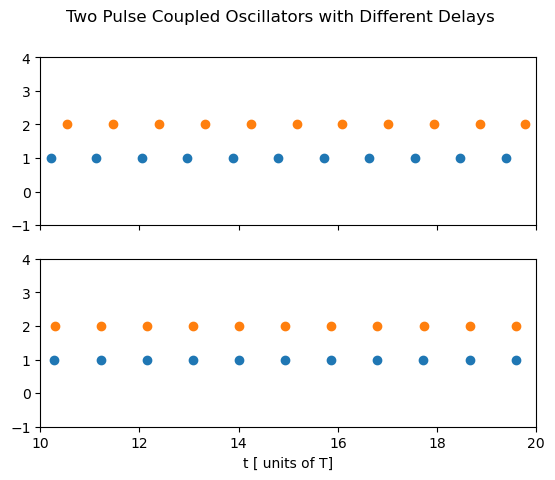

In [12]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2,sharex=True, sharey=True,)

axs[0].plot(firstA,np.ones((spikesA,1)),'o')
axs[0].plot(firstB,2*np.ones((spikesB,1)),'o')

axs[1].plot(secondA,np.ones((spikes2A,1)),'o')
axs[1].plot(secondB,2*np.ones((spikes2B,1)),'o')

plt.ylim([-1,4])
plt.xlim([10,20])
plt.xlabel('t [ units of T]')
fig.suptitle('Two Pulse Coupled Oscillators with Different Delays')
plt.show()

The top figure has a delay of 0.1 while the bottom figure has a delay of 0.7. As you can see, with a delay of 0.1, the two cells tend toward anti-synchrony, while a delay of 0.7 leads to synchrony.